# Cestnoprometne nesreče in udeleženci v nesrečah



<h2>Branje podatkov v DataFrame</h2>

Uvozimo Pandas, MatPlotLib ter datoteko PR.mplstyle.

In [330]:
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
import re
import collections
plt.style.use('PR.mplstyle')

Preberemo podatke iz vsake datoteke posebej in jih shranimo v DataFrame.

In [294]:
vrsta_ceste_1 = pd.read_csv('Data/vrsta_ceste_1.csv', sep=',', skiprows=2)
po_lokaciji_2 = pd.read_csv('Data/po_lokaciji_2.csv', sep=',', skiprows=2)
po_mesecu_v_letu_3 = pd.read_csv('Data/po_mesecu_v_letu_3.csv', sep=',', skiprows=2)
po_dnevu_v_tednu_4 = pd.read_csv('Data/po_dnevu_v_tednu_4.csv', sep=',', skiprows=2)
po_urah_dneva_5 = pd.read_csv('Data/po_urah_dneva_5.csv', sep=',', skiprows=2)
po_vrstah_udelezencev_6 = pd.read_csv('Data/po_vrstah_udelezencev_6.csv', sep=',', skiprows=2)
pod_vplivom_alkohola_7 = pd.read_csv('Data/pod_vplivom_alkohola_7.csv', sep=',', skiprows=2)
statisticne_regije_8 = pd.read_csv('Data/statisticne_regije_8.csv', sep=',', skiprows=2)
evidenca_izdanih_potrdil = pd.read_csv('Data/evidenca_izdanih_potrdil.csv', sep=';', skiprows=7)

Grafični prikaz vseh cestnoprometnih nesreč po letih.

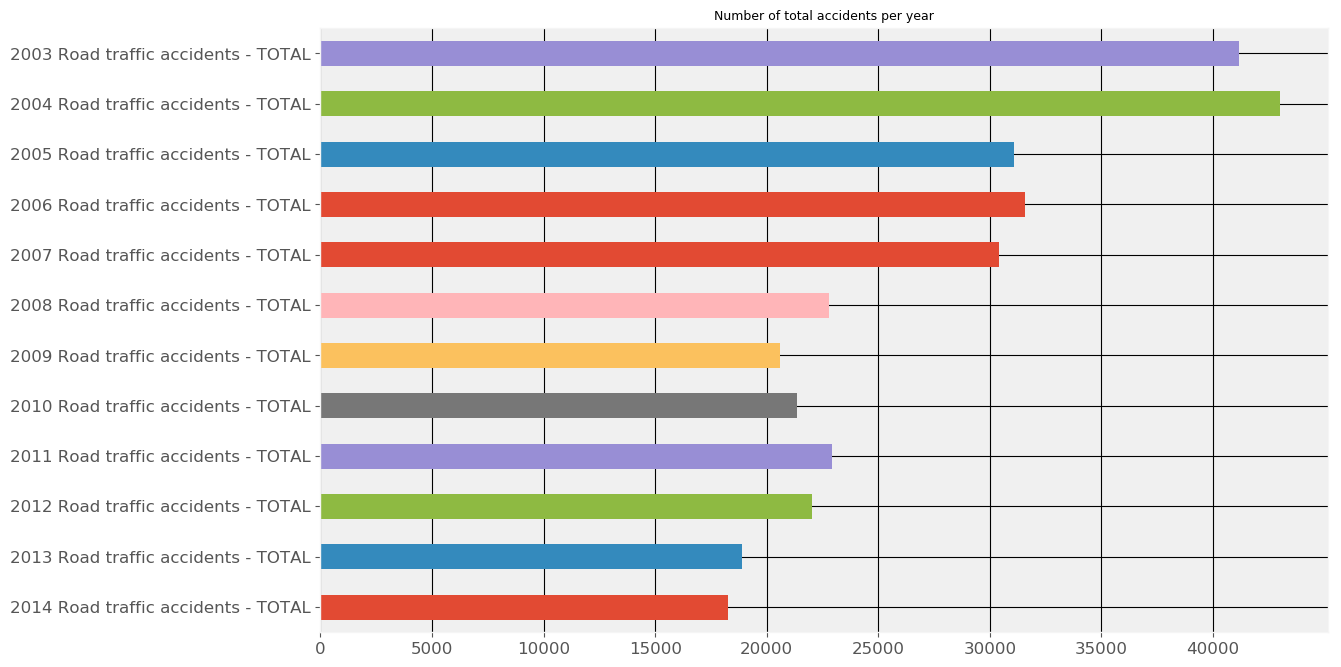

In [265]:
dataVrstaCesteYears = vrsta_ceste_1[['2014 Road traffic accidents - TOTAL', '2013 Road traffic accidents - TOTAL', 
                    '2012 Road traffic accidents - TOTAL', '2011 Road traffic accidents - TOTAL', 
                    '2010 Road traffic accidents - TOTAL', '2009 Road traffic accidents - TOTAL',
                    '2008 Road traffic accidents - TOTAL', '2007 Road traffic accidents - TOTAL',
                    '2006 Road traffic accidents - TOTAL', '2005 Road traffic accidents - TOTAL',
                    '2004 Road traffic accidents - TOTAL', '2003 Road traffic accidents - TOTAL']]

dataVrstaCesteYears.iloc[0,:].plot(kind='barh', fontsize=12, figsize=(13,8), xticks=(0, 5000, 10000, 15000, 20000, 25000, 
                                    30000, 35000, 40000), title='Number of total accidents per year').grid(color='k')

Grafični prikaz vseh cestnoprometnih nesreč glede na vrsto ceste.

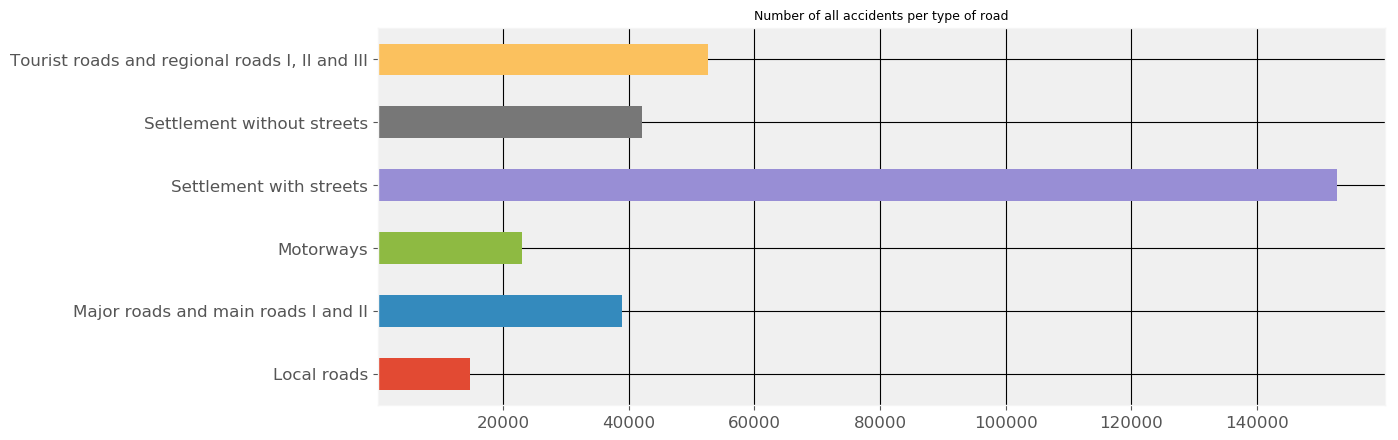

In [223]:
dataVrstaCeste = dataVrstaCesteYears.iloc[1:,:].sum(axis='columns')
#dataVrstaCeste.plot(kind='barh', fontsize=12, figsize=(13, 3)).grid(color='k')

dictVrstaCeste = [{'Motorways': dataVrstaCeste[1], 'Major roads and main roads I and II': dataVrstaCeste[2],
                  'Tourist roads and regional roads I, II and III': dataVrstaCeste[3], 'Local roads': dataVrstaCeste[4],
                  'Settlement with streets': dataVrstaCeste[5], 'Settlement without streets': dataVrstaCeste[6]}]

typeOfRoadNetworkSum = pd.DataFrame(dictVrstaCeste)
typeOfRoadNetworkSum.iloc[0,:].plot(kind='barh', fontsize=12, figsize=(13,5), xticks=(20000, 40000, 60000, 80000, 100000,
                                    120000, 140000), title='Number of all accidents per type of road').grid(color='k')

Grafični prikaz vseh cestnoprometnih nesreč v katerih je nastala materialna škoda po letih.

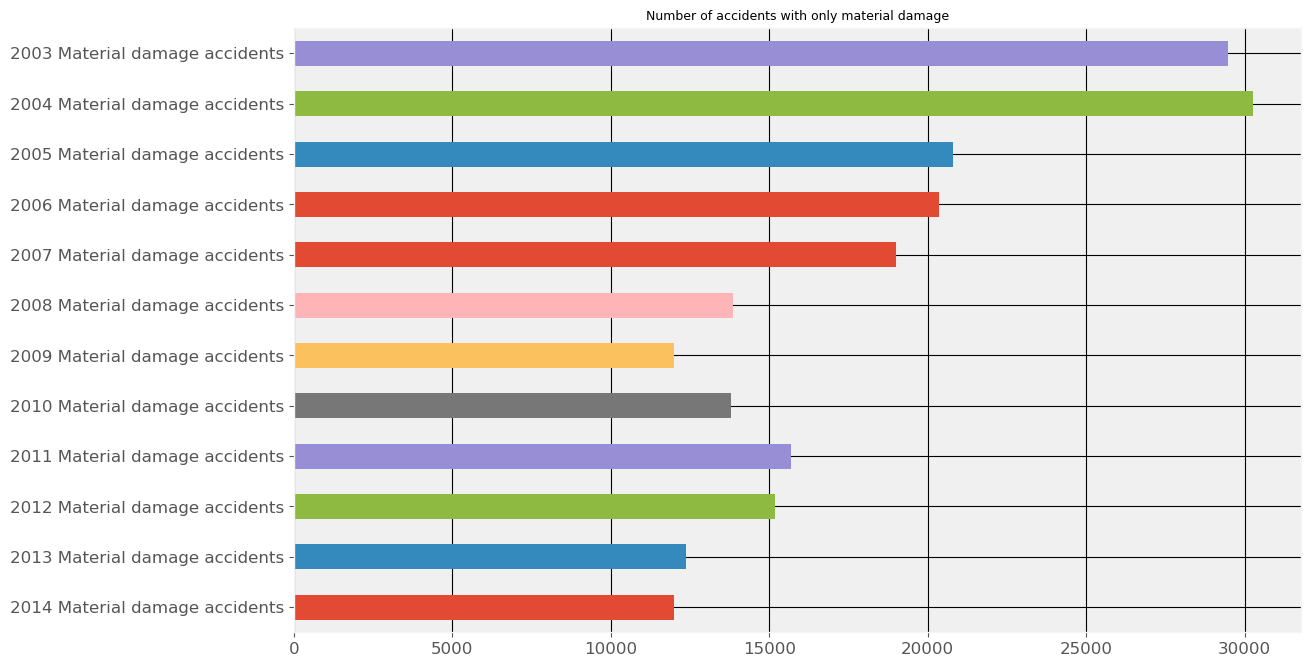

In [264]:
dataVrsteCesteMaterial = vrsta_ceste_1[['2014 Material damage accidents', '2013 Material damage accidents', 
                    '2012 Material damage accidents', '2011 Material damage accidents', 
                    '2010 Material damage accidents', '2009 Material damage accidents', 
                    '2008 Material damage accidents', '2007 Material damage accidents', 
                    '2006 Material damage accidents', '2005 Material damage accidents', 
                    '2004 Material damage accidents', '2003 Material damage accidents']]

dataVrsteCesteMaterial.iloc[0,:].plot(kind='barh', fontsize=12, figsize=(13,8), xticks=(0, 5000, 10000, 15000, 20000, 25000, 
                                    30000), title='Number of accidents with only material damage').grid(color='k')

Grafični prikaz vseh cestnoprometnih nesreč glede na regijo.

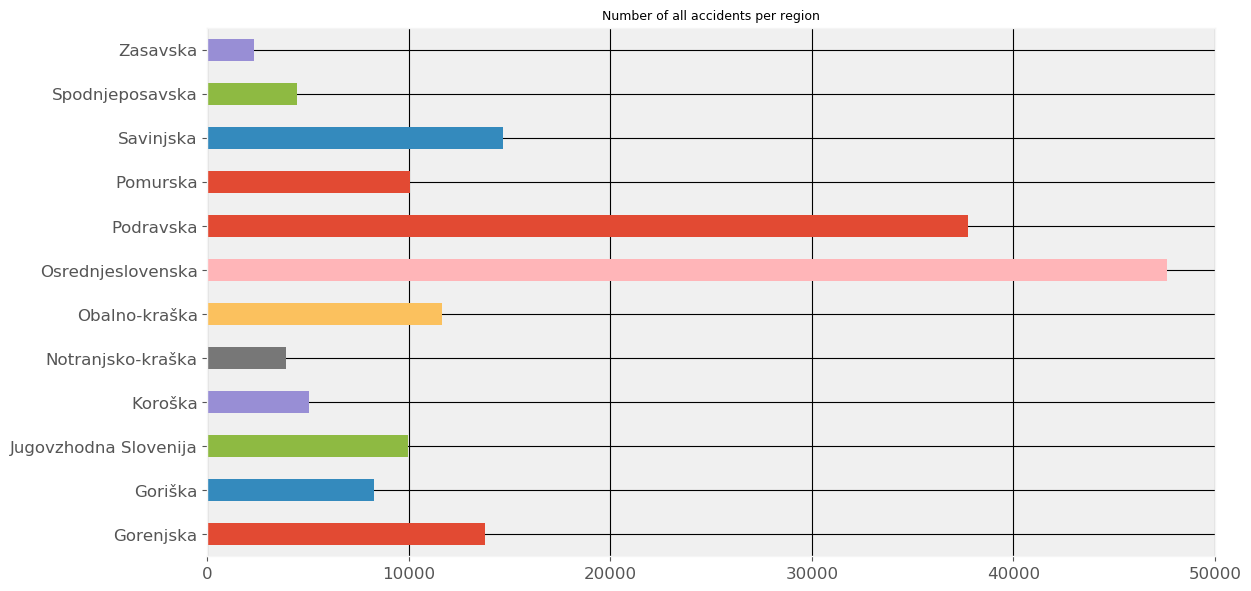

In [263]:
dataStatisticneYears = statisticne_regije_8[['2014 Road traffic accidents - TOTAL', '2013 Road traffic accidents - TOTAL', 
                    '2012 Road traffic accidents - TOTAL', '2011 Road traffic accidents - TOTAL', 
                    '2010 Road traffic accidents - TOTAL', '2009 Road traffic accidents - TOTAL',
                    '2008 Road traffic accidents - TOTAL', '2007 Road traffic accidents - TOTAL']]

dataStatisticneRegije = dataStatisticneYears.iloc[1:,:].sum(axis='columns')
#dataVrstaCeste.plot(kind='barh', fontsize=12, figsize=(13, 3)).grid(color='k')

dictStatisticneRegije = [{'Pomurska': dataStatisticneRegije[1], 'Podravska': dataStatisticneRegije[2],
                          'Koroška': dataStatisticneRegije[3], 'Savinjska': dataVrstaCeste[4],
                          'Zasavska': dataStatisticneRegije[5], 'Spodnjeposavska': dataStatisticneRegije[6],
                         'Jugovzhodna Slovenija': dataStatisticneRegije[7], 'Osrednjeslovenska': dataStatisticneRegije[8],
                         'Gorenjska': dataStatisticneRegije[9], 'Notranjsko-kraška': dataStatisticneRegije[10],
                         'Goriška': dataStatisticneRegije[11], 'Obalno-kraška': dataStatisticneRegije[12],}]

regionSum = pd.DataFrame(dictStatisticneRegije)
regionSum.iloc[0,:].plot(kind='barh', fontsize=12, figsize=(13,7), title='Number of all accidents per region').grid(color='k')


Grafični prikaz cestnoprometnih nesreč za Osrednjeslovensko regijo, kjer je bilo največ nesreč skozi leta.

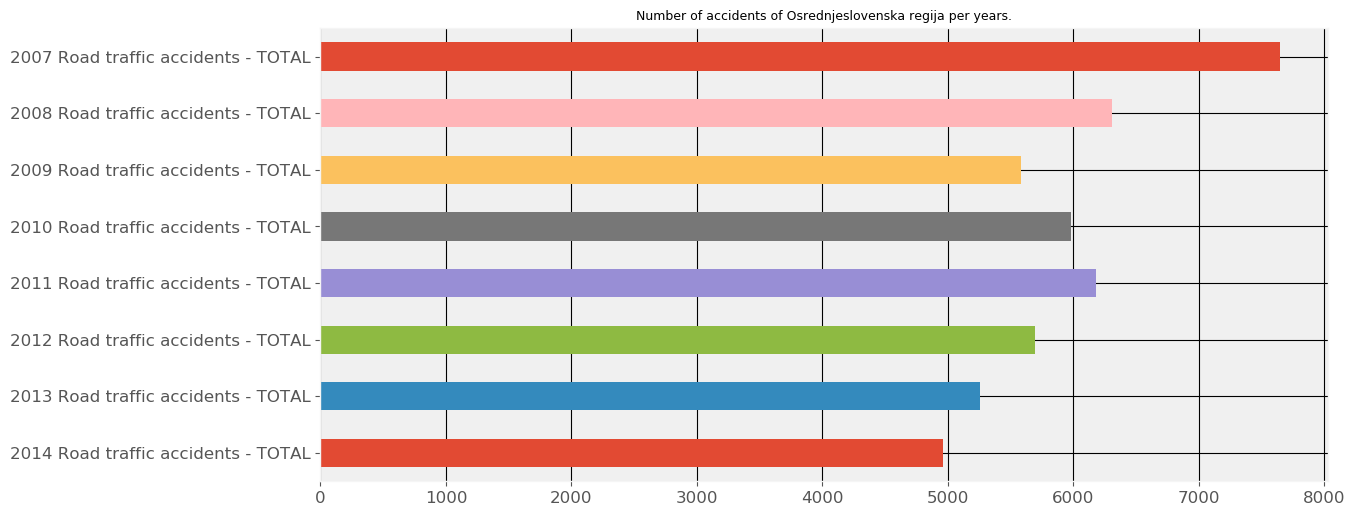

In [275]:
dataStatisticneYears.iloc[8,:].plot(kind='barh', fontsize=12, figsize=(13,6),
                                title='Number of accidents of Osrednjeslovenska regija per years.').grid(color='k')

In [352]:
dictCities = collections.defaultdict(int)
for name in evidenca_izdanih_potrdil['NAZIV IN NASLOV KONTROLNEGA ORGANA     (po abecednem vrstnem redu )']: 
    name = name.replace('\t', ' ')
    name = re.sub(' +', ' ', name)
    name = name.split(', ')
    name = name[-1].split(' ')
    if name[-1] == '':
        name = name[-2]
    else:
        name = name[-1]
    dictCities[name] += 1

dataCities

[defaultdict(int,
             {'AJDOVSCINA': 1,
              'BISTRICA': 3,
              'BOSTANJ': 1,
              'BREZICE': 1,
              'BREZOVICA': 1,
              'CELJE': 3,
              'CRNOMELJ': 1,
              'DIVACA': 1,
              'DOLINI': 1,
              'DRAVOGRAD': 1,
              'GORICA': 2,
              'GORICI': 2,
              'GRADEC': 1,
              'GROSUPLJE': 1,
              'IZOLA': 1,
              'JESENICE': 1,
              'KAMNIK': 1,
              'KOCEVJE': 1,
              'KOPER': 3,
              'KRANJ': 3,
              'KRSKEM': 1,
              'KRSKO': 1,
              'LENART': 1,
              'LENDAVA': 1,
              'LESCE': 1,
              'LITIJA': 1,
              'LJUBLJANA': 8,
              'LJUBLJANI': 1,
              'LJUTOMER': 1,
              'LOKA': 1,
              'Logatec': 1,
              'MARIBOR': 5,
              'MESTO': 1,
              'ORMOZ': 1,
              'OTOCEC': 1,
              